In [ ]:

!pip install numpy
!pip install opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

def ZFNet(input_shape):
    model = Sequential([
        Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(384, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
# Define parameters
input_shape = (224, 224, 3)  # Input shape of ZFNet
# num_classes = 2  # Number of classes (cataract vs non-cataract)
learning_rate = 0.0001
batch_size = 32
epochs = 15


In [ ]:

model = ZFNet(input_shape)
model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 109, 109, 96)      14208     
                                                                 
 max_pooling2d (MaxPooling2  (None, 54, 54, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 384)       1

In [ ]:

train_data_dir = '/content/drive/MyDrive/Eye_AI_latest_may24/Thread1/dataset/Global Dataset/Resized/Splitted_Data/train'
validation_data_dir = '/content/drive/MyDrive/Eye_AI_latest_may24/Thread1/dataset/Global Dataset/Resized/Splitted_Data/validation'
test_data_dir = '/content/drive/MyDrive/Eye_AI_latest_may24/Thread1/dataset/Global Dataset/Resized/Splitted_Data/test'


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

test_generator = val_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)


Found 1832 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [ ]:

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size,
                    epochs=epochs)


Epoch 1/15
57/57 [==============================] - 489s 8s/step - loss: 0.6801 - accuracy: 0.5689 - val_loss: 0.6768 - val_accuracy: 0.5990
Epoch 2/15
57/57 [==============================] - 33s 586ms/step - loss: 0.6478 - accuracy: 0.6502 - val_loss: 0.6371 - val_accuracy: 0.6458
Epoch 3/15
57/57 [==============================] - 36s 627ms/step - loss: 0.6245 - accuracy: 0.6594 - val_loss: 0.6352 - val_accuracy: 0.6927
Epoch 4/15
57/57 [==============================] - 35s 607ms/step - loss: 0.6031 - accuracy: 0.6817 - val_loss: 0.5966 - val_accuracy: 0.6667
Epoch 5/15
57/57 [==============================] - 35s 607ms/step - loss: 0.5310 - accuracy: 0.7461 - val_loss: 0.4952 - val_accuracy: 0.7708
Epoch 6/15
57/57 [==============================] - 35s 618ms/step - loss: 0.4236 - accuracy: 0.8117 - val_loss: 0.3900 - val_accuracy: 0.8542
Epoch 7/15
57/57 [==============================] - 34s 603ms/step - loss: 0.3777 - accuracy: 0.8411 - val_loss: 0.3899 - val_accuracy: 0.8438
E

In [ ]:

score = model.evaluate(validation_generator)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


7/7 [==============================] - 2s 350ms/step - loss: 0.2758 - accuracy: 0.8971
Test Loss: 0.27579590678215027
Test Accuracy: 0.8970588445663452


In [ ]:
predictions = model.predict(test_generator)

predicted_classes = (predictions > 0.5).astype(int).flatten()


true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print("\nAccuracy:", accuracy)


16/16 [==============================] - 229s 15s/step
Confusion Matrix:
[[201  34]
 [ 24 252]]

Classification Report:
              precision    recall  f1-score   support

    cataract       0.89      0.86      0.87       235
      normal       0.88      0.91      0.90       276

    accuracy                           0.89       511
   macro avg       0.89      0.88      0.89       511
weighted avg       0.89      0.89      0.89       511


Accuracy: 0.8864970645792564


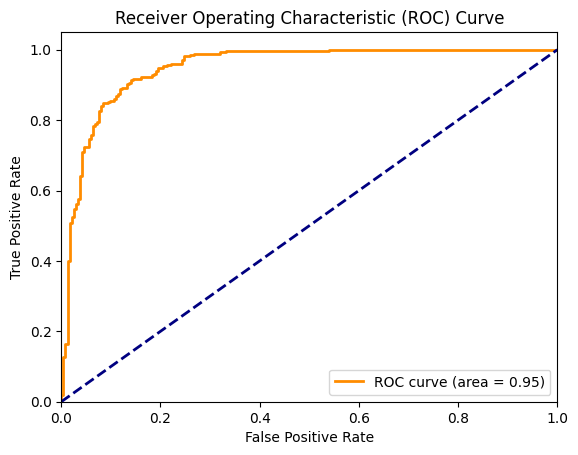

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

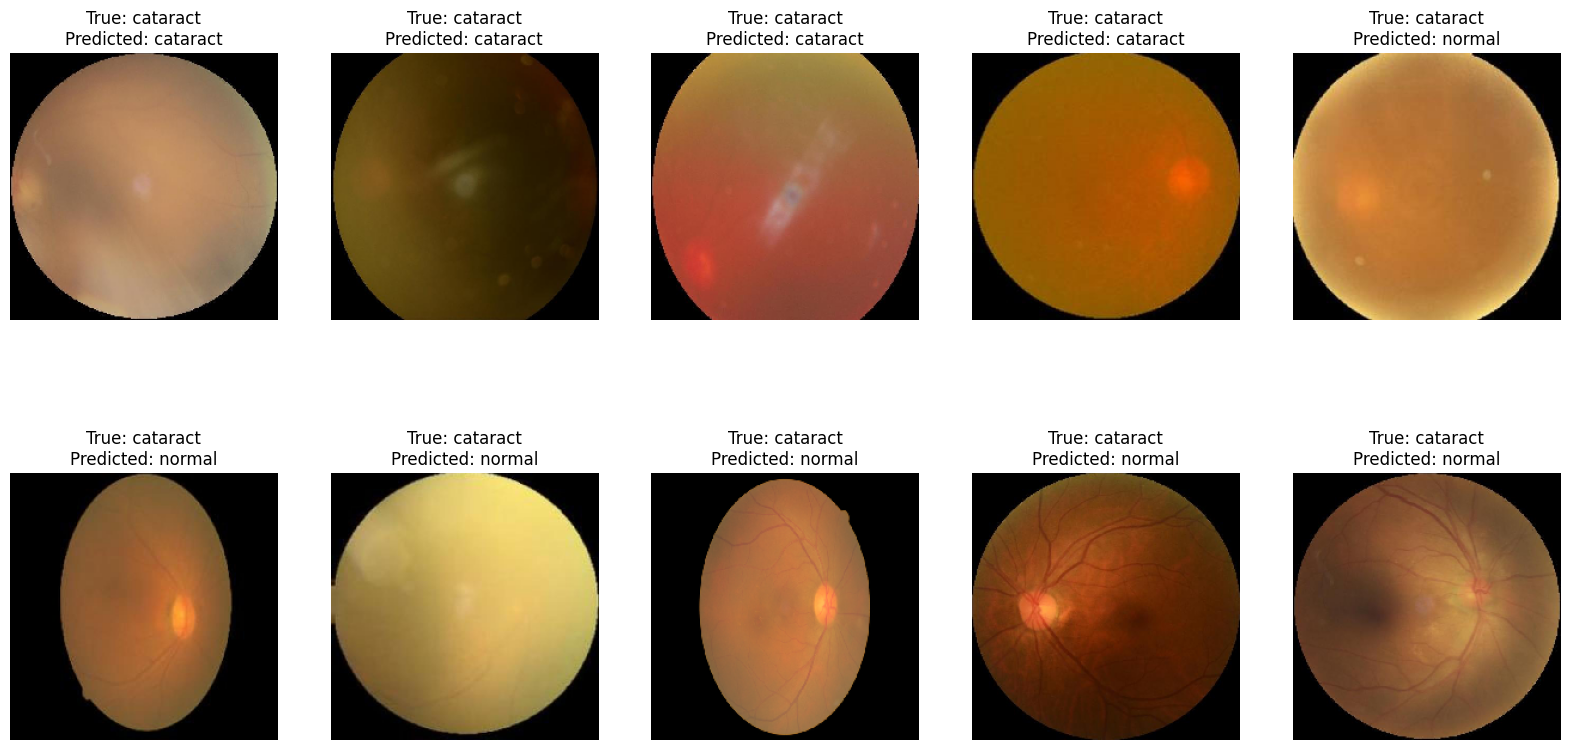

In [ ]:
def plot_images_with_predictions(test_generator, predictions, predicted_classes, true_classes, class_labels, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        image_batch, label_batch = test_generator[i]
        image = image_batch[0]
        true_label = int(label_batch[0])

        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(image)
        plt.title(f"True: {class_labels[true_classes[i]]}\nPredicted: {class_labels[predicted_classes[i]]}")
        plt.axis('off')
    plt.show()


plot_images_with_predictions(test_generator, predictions, predicted_classes, true_classes, class_labels, num_images=10)


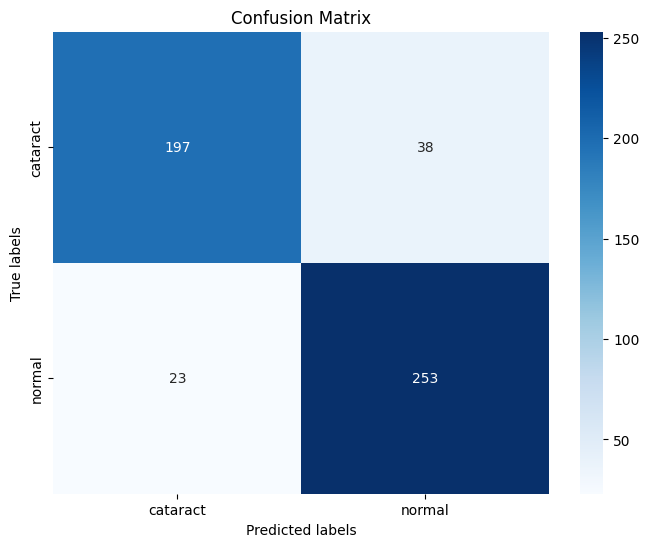

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


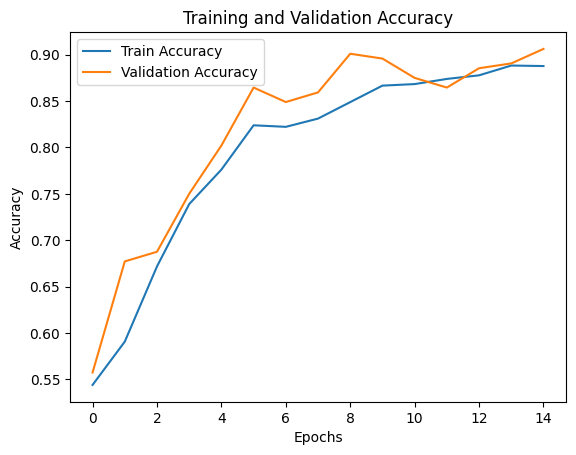

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()